## Содержание
- [Описание задачи](#link1)


## Описание задачи
<a id='link1'></a>

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами,
в связи с чем возникла задача - правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача - разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### Этапы

- загрузка и ознакомление с данными,
- предварительная обработка,
- полноценный разведочный анализ,
- разработка новых синтетических признаков,
- проверка на мультиколлинеарность,
- отбор финального набора обучающих признаков,
- выбор и обучение моделей,
- итоговая оценка качества предсказания лучшей модели,
- анализ важности ее признаков.


### Дополнительное задание

Для тех, кому этого покажется мало у нас есть дополнительное задание — реализовать решение с использованием технологии pipeline (из библиотеки sklearn, imblearn).
Подготовка отчета по исследованию. 

Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.

### Описание полей данных

- instance_id -Уникальный идентификатор трека
- track_name - Название трека
- popularity - Популярность трека
- acousticness - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
- danceability - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
- duration_ms - Продолжительность трека в миллисекундах.
- energy - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
- instrumentalness - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
- key - базовый ключ (нота) произведения
- liveness - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
- loudness - Общая громкость трека в децибелах (дБ)
- mode - Указывает на модальность (мажорную или минорную) трека
- speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
- tempo - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
- obtained_date - дата загрузки в сервис
- valence - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
- music_genre - Музыкальный жанр трека

## Импорт библиотек

In [3]:
# импортируем стандартные библиотеки
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Импортируем библиотеки классфикации
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler,
    LabelEncoder)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# импортируем классы для перебора параметров 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, confusion_matrix, make_scorer

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем функцию для работы с метриками
from sklearn.metrics import mean_squared_error

In [17]:
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

## Загрузка и EDA, предобработка

In [18]:
def df_uni_describe(df):
    """
    универсальная функция для описания датафрейма
    """
    try:
        print("\033[1m" + 'Main info:' + "\033[0m")
        print("Number of variables:", len(df.columns))
        print("Number of observations:", len(df))
        print('Total missing: {:.2%}'.format(df.isna().sum().sum()/(len(df.columns)*len(df))))
        print('Total duplicates: {}'.format(df.duplicated().sum()))
#         print('Total size of dataFrame: {} MB.'.format(sys.getsizeof(df)/1000000)) #мой расчет не совпадаетс оценкой info, пометка чтобы разобратьсяв будущем.
        if df.isna().sum().sum() > 0:
            print("\033[1m" + 'Missing (NaNs), %' + "\033[0m")
            display(pd.DataFrame(round((df.isna().mean()*100),2).sort_values(ascending=False),\
                             columns=['NaNs, %']).style.format('{:.2f}').background_gradient('coolwarm'))
        print("\033[1m" + 'Info of dataframe:' + "\033[0m")
        display(df.info())
        print("\033[1m" + 'Head of dataframe:' + "\033[0m")
        display(df.head(2))
        display(df.describe())
    except: #я точно (наверное) обработаю разные ошибки потом
        print('Something wrong, contact the developer')

In [19]:
df = pd.read_csv('datasets/kaggle_music_genre_train.csv')
df_uni_describe(df)

Main info:
Number of variables: 17
Number of observations: 40000
Total missing: 3.84%
Total duplicates: 0
Missing (NaNs), %


,"NaNs, %"
track_name,26.69
obtained_date,15.66
popularity,9.84
danceability,5.12
mode,4.57
key,3.44
loudness,0.00
valence,0.00
tempo,0.00
speechiness,0.00


Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29324 non-null  object 
 2   popularity        36063 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37954 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38624 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38174 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33738 non-null  object 
 15  valence           40000 non-null  float64
 16  music_genre       400

None

Head of dataframe:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,28097,NaN,38.00,0.05,NaN,"152,427.00",0.64,0.02,F#,0.11,-9.11,Minor,0.06,167.357,4-Apr,0.60,Country
1,49793,Uber Everywhere,67.00,0.05,0.78,-1.00,0.46,0.00,C#,0.18,-15.03,Major,0.28,140.181,4-Apr,0.20,Rap


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,"40,000.00","36,063.00","40,000.00","37,954.00","40,000.00","40,000.00","40,000.00","40,000.00","40,000.00","40,000.00","40,000.00"
mean,"26,050.12",44.13,0.31,0.56,"221,080.78",0.60,0.18,0.19,-11.67,0.13,0.46
std,"14,441.50",15.56,0.34,0.18,"129,611.78",0.26,0.33,0.16,14.51,0.21,0.25
min,"1,000.00",0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-108.36,0.02,0.00
25%,"13,554.75",34.00,0.02,0.44,"174,793.75",0.43,0.00,0.10,-11.53,0.04,0.26
50%,"26,079.50",45.00,0.14,0.57,"219,142.00",0.64,0.00,0.13,-7.46,0.05,0.45
75%,"38,562.25",55.00,0.55,0.69,"268,480.00",0.82,0.15,0.24,-5.25,0.11,0.65
max,"50,999.00",99.00,1.00,0.99,"4,830,606.00",1.00,0.99,1.00,1.95,1.89,0.99


In [20]:
df_test = pd.read_csv('datasets/kaggle_music_genre_test.csv')
df_uni_describe(df_test)

Main info:
Number of variables: 16
Number of observations: 10000
Total missing: 4.13%
Total duplicates: 0
Missing (NaNs), %


,"NaNs, %"
track_name,26.74
obtained_date,15.38
popularity,9.98
danceability,5.14
mode,5.09
key,3.74
instance_id,0.00
acousticness,0.00
duration_ms,0.00
energy,0.00


Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7326 non-null   object 
 2   popularity        9002 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9486 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9626 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9491 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  object 
 14  obtained_date     8462 non-null   object 
 15  valence           10000 non-null  float64
dtypes: float64(10), int64(

None

Head of dataframe:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,32911,Pretty Green,30.00,0.09,0.43,"249,640.00",0.86,0.00,D,0.16,-5.70,Major,0.08,177.023,NaN,0.34
1,30681,Son Of The Sun,45.00,0.07,0.51,"190,253.00",0.75,0.00,A,0.32,-6.92,Major,0.03,?,4-Apr,0.58


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,"10,000.00","9,002.00","10,000.00","9,486.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"25,797.03",44.53,0.31,0.56,"221,939.91",0.60,0.18,0.19,-11.60,0.13,0.45
std,"14,402.40",15.39,0.34,0.18,"124,845.90",0.26,0.33,0.16,14.26,0.22,0.25
min,"1,012.00",0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-104.18,0.02,0.02
25%,"13,238.50",34.00,0.02,0.44,"174,846.50",0.43,0.00,0.10,-11.56,0.04,0.26
50%,"25,704.50",45.00,0.15,0.57,"220,362.00",0.64,0.00,0.12,-7.48,0.05,0.44
75%,"38,237.00",56.00,0.55,0.69,"268,947.50",0.81,0.15,0.24,-5.25,0.12,0.65
max,"50,988.00",96.00,1.00,0.98,"2,294,000.00",1.00,1.00,0.99,3.74,1.79,0.99


In [21]:
df_sample= pd.read_csv('datasets/sample_submission.csv')
df_uni_describe(df_sample)

Main info:
Number of variables: 2
Number of observations: 10000
Total missing: 0.00%
Total duplicates: 0
Info of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instance_id  10000 non-null  int64 
 1   music_genre  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


None

Head of dataframe:


,instance_id,music_genre
0,32911,Rap
1,30681,Country


,instance_id
count,"10,000.00"
mean,"25,797.03"
std,"14,402.40"
min,"1,012.00"
25%,"13,238.50"
50%,"25,704.50"
75%,"38,237.00"
max,"50,988.00"


### Обзор данных
 
- полных дублей нет
- пропуски (NaNs, %):
    - track_name	26.69
    - obtained_date	15.66
    - popularity	9.84
    - danceability	5.12
    - mode	4.57
    - key	3.44
- tempo - надо поправить тип - есть не цифровые данные. 

### Обработка пропущенных значений

In [22]:
print("Сколько id имеют совпадающие значения во всех признаках:", df.drop(['instance_id', 'track_name', 'obtained_date'], axis=1).duplicated().sum())

Сколько id имеют совпадающие значения во всех признаках: 0


In [23]:
print("Сколько id имеют совпадающие значения во всех признаках:", df_test.drop(['instance_id', 'track_name', 'obtained_date'], axis=1).duplicated().sum())

Сколько id имеют совпадающие значения во всех признаках: 39


Для 39 треков предсказания будут одинаковыми. 

In [24]:
### Обработка категориальных столбцов - поиск на неявные дубли. 
cat_col = df.select_dtypes(include=['object']).columns
for col in cat_col:
    print(col, ':', df[col].unique())

track_name : [nan 'Uber Everywhere' 'Love Is All' ...
 'Violin Concerto in G Minor, RV 315, "Summer" from "The Four Seasons": III. Presto. Tempo impettuoso d\'estate'
 'Hey There' 'Dna Rhapsody']
key : ['F#' 'C#' 'D' 'E' 'G' 'A' nan 'B' 'F' 'C' 'A#' 'G#' 'D#']
mode : ['Minor' 'Major' nan]
tempo : ['167.357' '140.181' '?' ... '116.955' '151.375' '171.882']
obtained_date : ['4-Apr' nan '3-Apr' '5-Apr' '1-Apr' '0/4']
music_genre : ['Country' 'Rap' 'Jazz' 'Hip-Hop' 'Rock' 'Alternative' 'Classical'
 'Electronic' 'Anime' 'Blues']


In [25]:
df['tempo'].replace('?', np.nan, inplace=True)
df.isna().mean()

instance_id        0.00
track_name         0.27
popularity         0.10
acousticness       0.00
danceability       0.05
duration_ms        0.00
energy             0.00
instrumentalness   0.00
key                0.03
liveness           0.00
loudness           0.00
mode               0.05
speechiness        0.00
tempo              0.10
obtained_date      0.16
valence            0.00
music_genre        0.00
dtype: float64

In [26]:
cat_col = df_test.select_dtypes(include=['object']).columns
for col in cat_col:
    print(col, ':', df_test[col].unique())

track_name : ['Pretty Green' 'Son Of The Sun' nan ... 'Kicking and Screaming'
 'Raphtalia' 'Come With Us']
key : ['D' 'A' 'F' 'G' nan 'G#' 'C#' 'B' 'C' 'D#' 'F#' 'E' 'A#']
mode : ['Major' 'Minor' nan]
tempo : ['177.023' '?' '103.13' ... '133.965' '165.86599999999999' '109.955']
obtained_date : [nan '4-Apr' '3-Apr' '1-Apr' '5-Apr']


In [27]:
df_test['tempo'].replace('?', np.nan, inplace=True)
df_test.isna().mean()

instance_id        0.00
track_name         0.27
popularity         0.10
acousticness       0.00
danceability       0.05
duration_ms        0.00
energy             0.00
instrumentalness   0.00
key                0.04
liveness           0.00
loudness           0.00
mode               0.05
speechiness        0.00
tempo              0.10
obtained_date      0.15
valence            0.00
dtype: float64

In [28]:
df.tempo = df.tempo.astype('float64')
df_test.tempo = df_test.tempo.astype('float64')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7326 non-null   object 
 2   popularity        9002 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9486 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9626 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9491 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             9016 non-null   float64
 14  obtained_date     8462 non-null   object 
 15  valence           10000 non-null  float64
dtypes: float64(11), int64(1), object(4)
memor

### Numerical columns analysis

In [29]:
# проверим на выбросы числовые столбцы:
def show_box_hist(col, bins=10):
    '''
    Функция которая строит для количественного параметра гистограмму и боксплот
    '''
    print('Описание данных в колонке {}'.format(col.name))
    display(col.describe())
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle('Оценим на выбросы параметр: {}'.format(col.name))
    col.plot(kind='hist', bins=bins, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    col.plot(kind='box', ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков')
    plt.show()

Оценим количественные данные в параметре popularity
Тренировочные данные:
Описание данных в колонке popularity


count   36,063.00
mean        44.13
std         15.56
min          0.00
25%         34.00
50%         45.00
75%         55.00
max         99.00
Name: popularity, dtype: float64

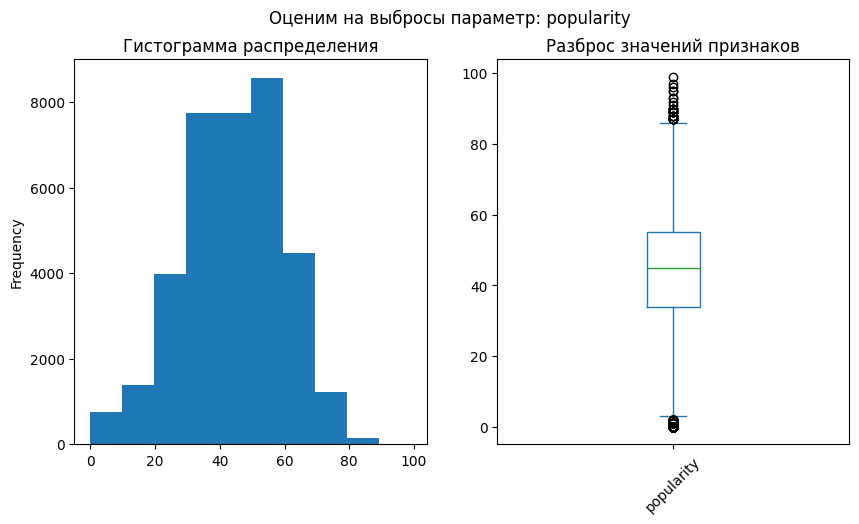

Тестовые данные:
Описание данных в колонке popularity


count   9,002.00
mean       44.53
std        15.39
min         0.00
25%        34.00
50%        45.00
75%        56.00
max        96.00
Name: popularity, dtype: float64

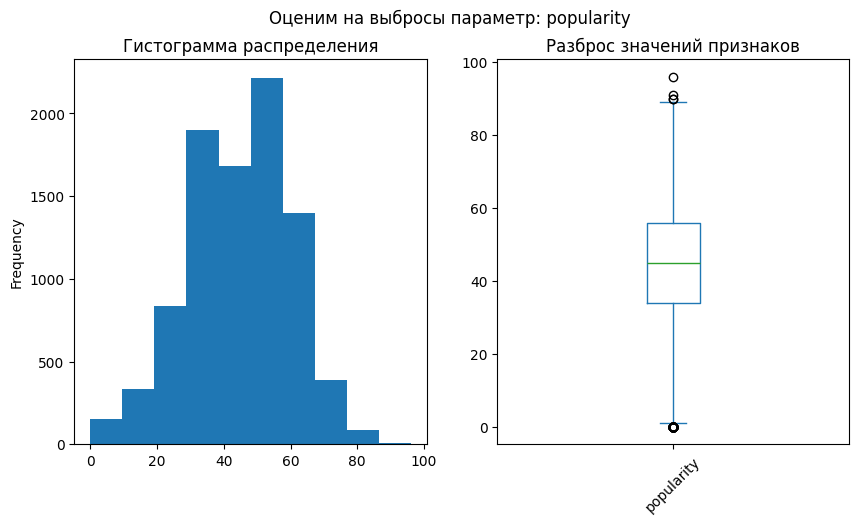

Оценим количественные данные в параметре acousticness
Тренировочные данные:
Описание данных в колонке acousticness


count   40,000.00
mean         0.31
std          0.34
min          0.00
25%          0.02
50%          0.14
75%          0.55
max          1.00
Name: acousticness, dtype: float64

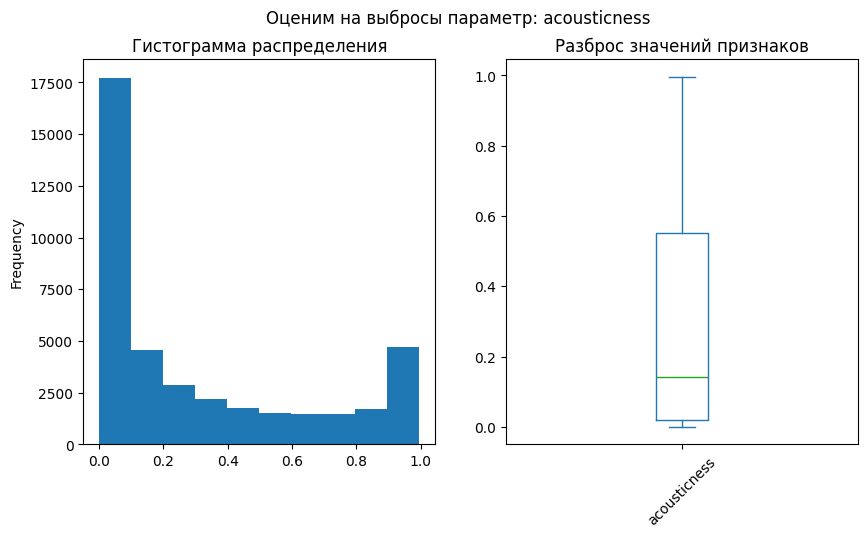

Тестовые данные:
Описание данных в колонке acousticness


count   10,000.00
mean         0.31
std          0.34
min          0.00
25%          0.02
50%          0.15
75%          0.55
max          1.00
Name: acousticness, dtype: float64

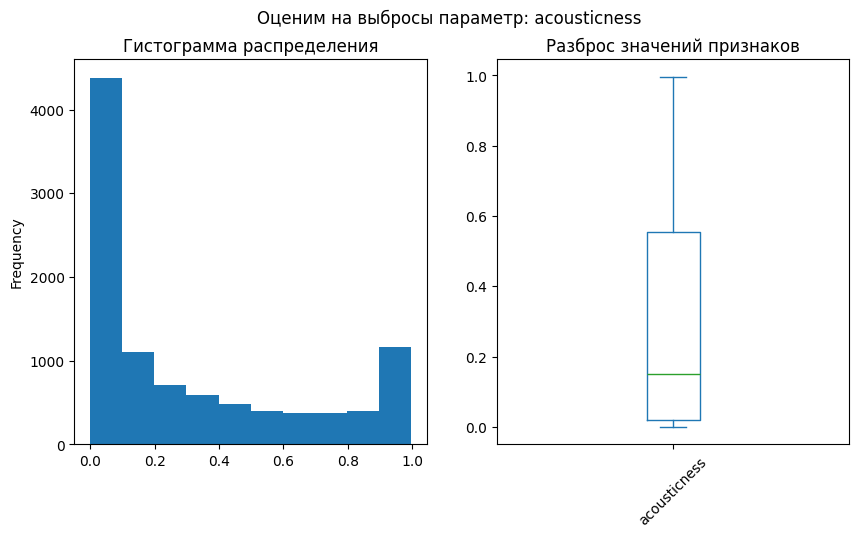

Оценим количественные данные в параметре danceability
Тренировочные данные:
Описание данных в колонке danceability


count   37,954.00
mean         0.56
std          0.18
min          0.06
25%          0.44
50%          0.57
75%          0.69
max          0.99
Name: danceability, dtype: float64

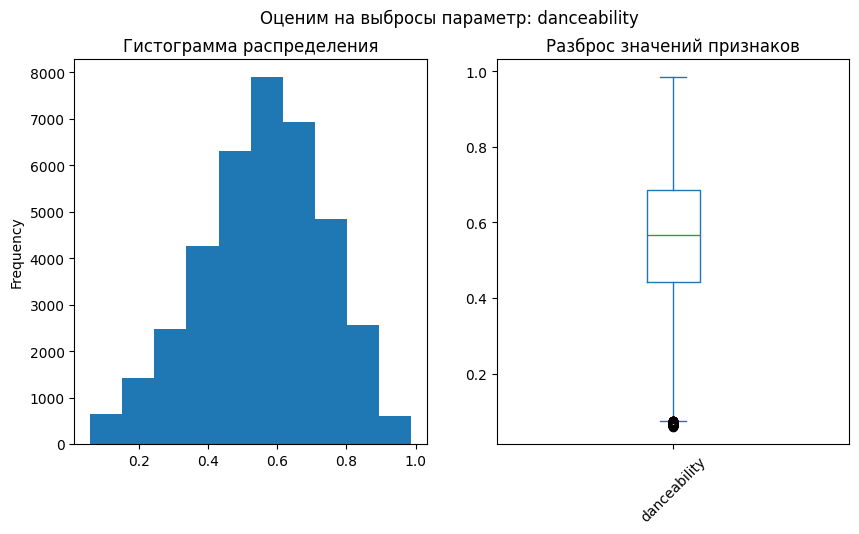

Тестовые данные:
Описание данных в колонке danceability


count   9,486.00
mean        0.56
std         0.18
min         0.06
25%         0.44
50%         0.57
75%         0.69
max         0.98
Name: danceability, dtype: float64

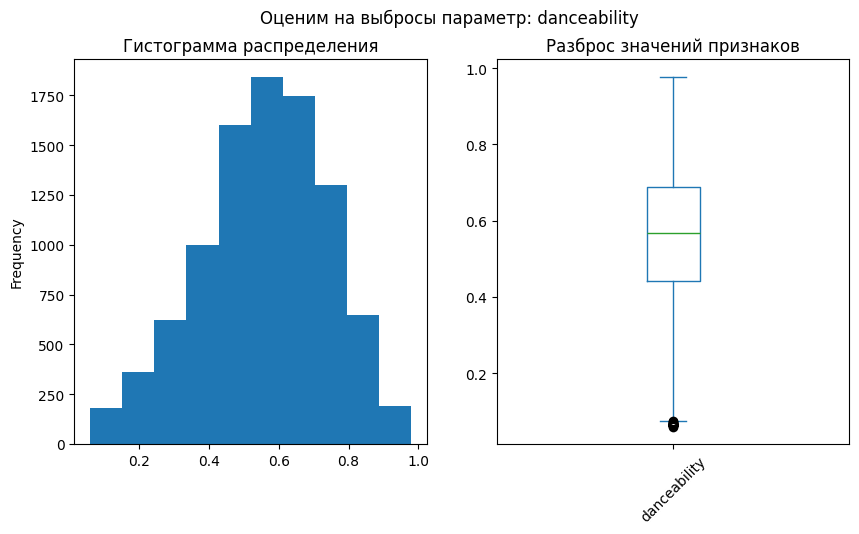

Оценим количественные данные в параметре duration_ms
Тренировочные данные:
Описание данных в колонке duration_ms


count      40,000.00
mean      221,080.78
std       129,611.78
min            -1.00
25%       174,793.75
50%       219,142.00
75%       268,480.00
max     4,830,606.00
Name: duration_ms, dtype: float64

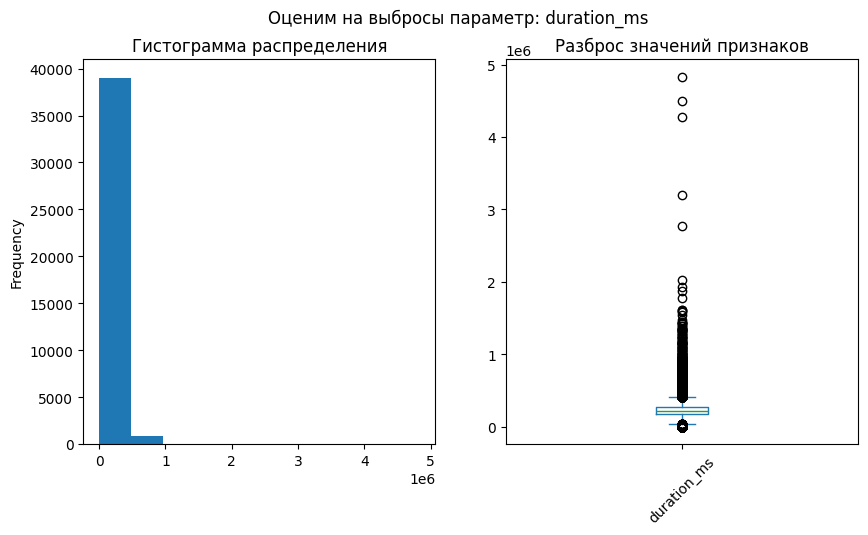

Тестовые данные:
Описание данных в колонке duration_ms


count      10,000.00
mean      221,939.91
std       124,845.90
min            -1.00
25%       174,846.50
50%       220,362.00
75%       268,947.50
max     2,294,000.00
Name: duration_ms, dtype: float64

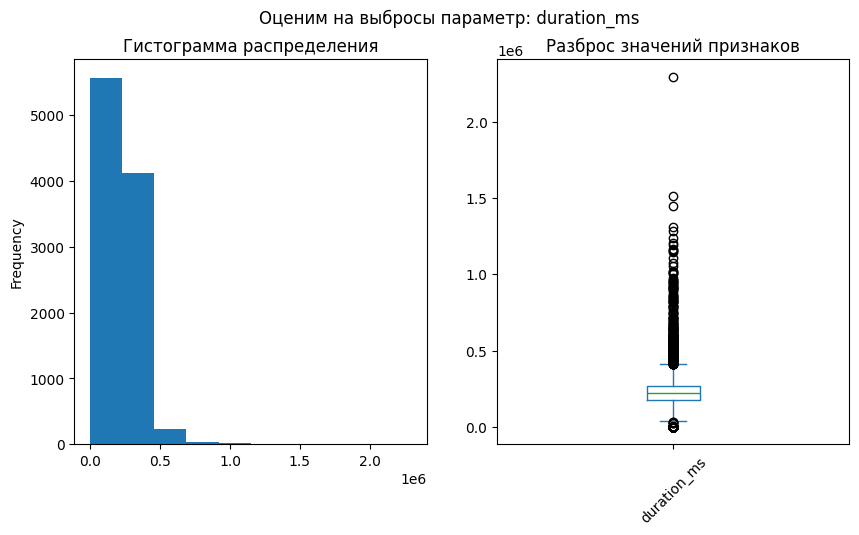

Оценим количественные данные в параметре energy
Тренировочные данные:
Описание данных в колонке energy


count   40,000.00
mean         0.60
std          0.26
min          0.00
25%          0.43
50%          0.64
75%          0.82
max          1.00
Name: energy, dtype: float64

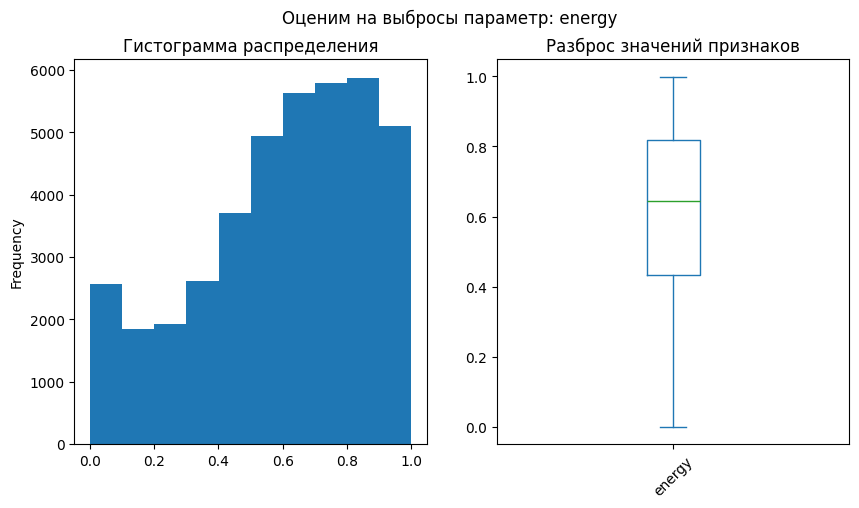

Тестовые данные:
Описание данных в колонке energy


count   10,000.00
mean         0.60
std          0.26
min          0.00
25%          0.43
50%          0.64
75%          0.81
max          1.00
Name: energy, dtype: float64

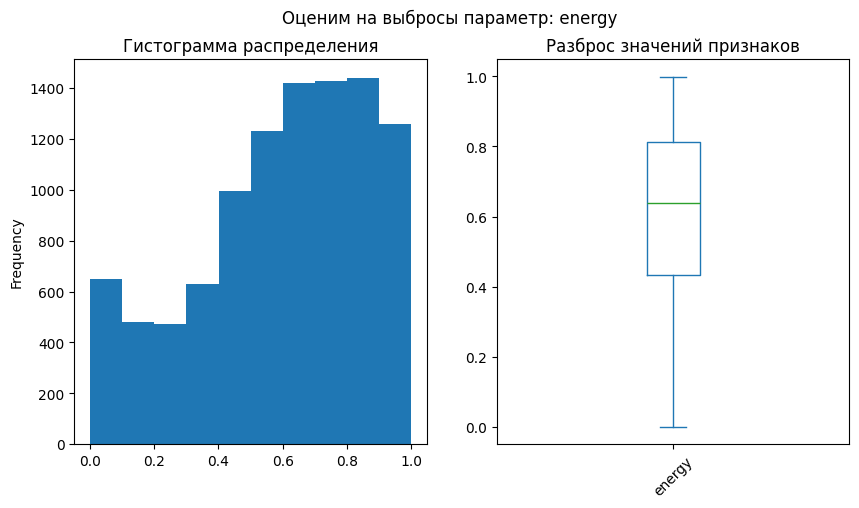

Оценим количественные данные в параметре instrumentalness
Тренировочные данные:
Описание данных в колонке instrumentalness


count   40,000.00
mean         0.18
std          0.33
min          0.00
25%          0.00
50%          0.00
75%          0.15
max          0.99
Name: instrumentalness, dtype: float64

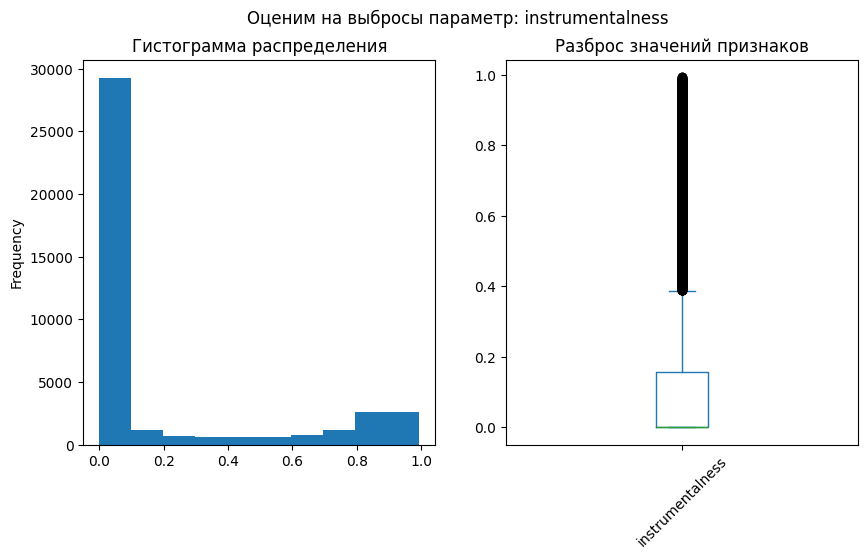

Тестовые данные:
Описание данных в колонке instrumentalness


count   10,000.00
mean         0.18
std          0.33
min          0.00
25%          0.00
50%          0.00
75%          0.15
max          1.00
Name: instrumentalness, dtype: float64

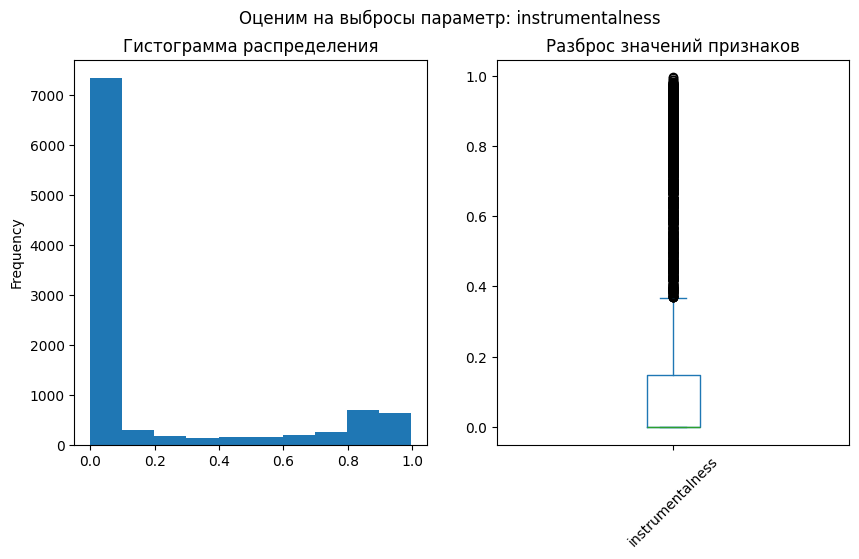

Оценим количественные данные в параметре liveness
Тренировочные данные:
Описание данных в колонке liveness


count   40,000.00
mean         0.19
std          0.16
min          0.01
25%          0.10
50%          0.13
75%          0.24
max          1.00
Name: liveness, dtype: float64

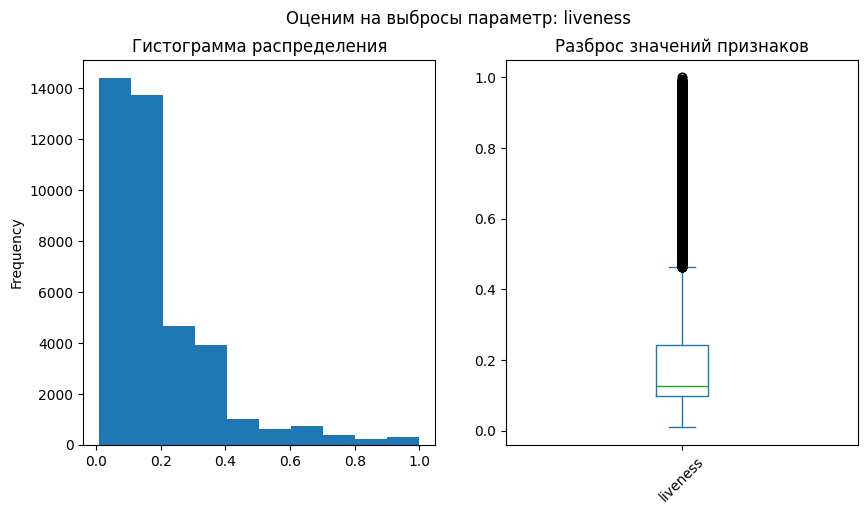

Тестовые данные:
Описание данных в колонке liveness


count   10,000.00
mean         0.19
std          0.16
min          0.01
25%          0.10
50%          0.12
75%          0.24
max          0.99
Name: liveness, dtype: float64

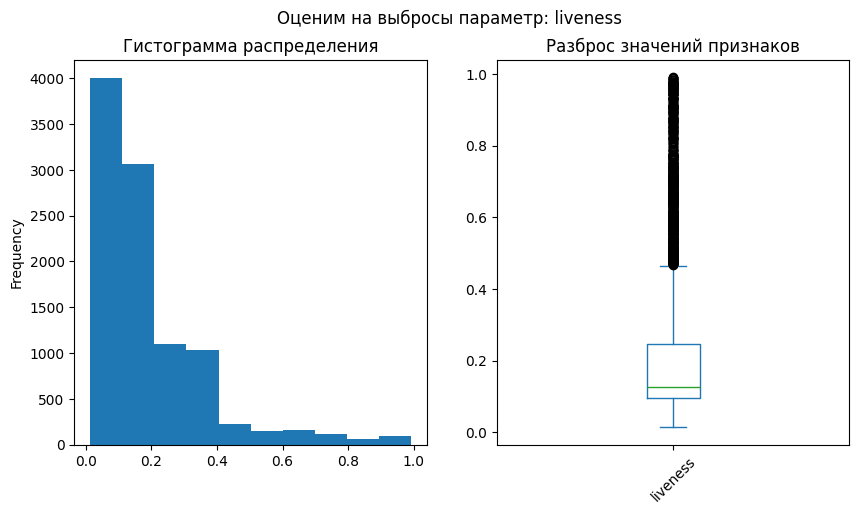

Оценим количественные данные в параметре loudness
Тренировочные данные:
Описание данных в колонке loudness


count   40,000.00
mean       -11.67
std         14.51
min       -108.36
25%        -11.53
50%         -7.46
75%         -5.25
max          1.95
Name: loudness, dtype: float64

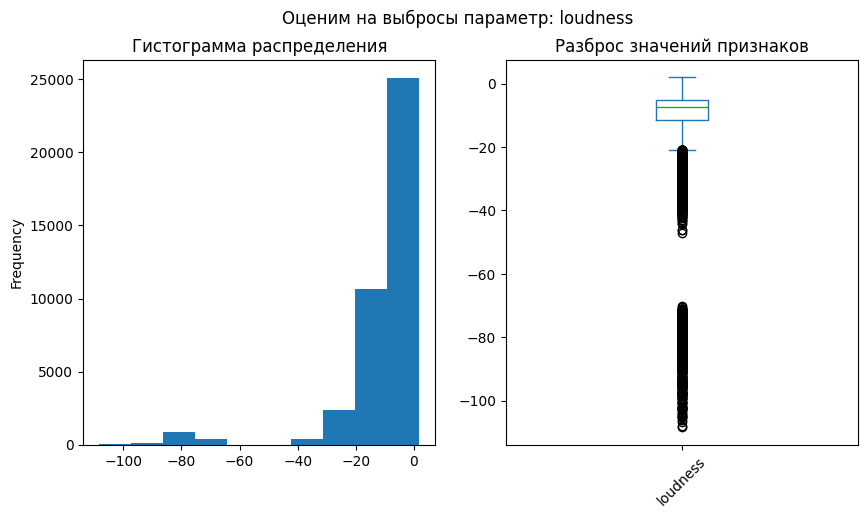

Тестовые данные:
Описание данных в колонке loudness


count   10,000.00
mean       -11.60
std         14.26
min       -104.18
25%        -11.56
50%         -7.48
75%         -5.25
max          3.74
Name: loudness, dtype: float64

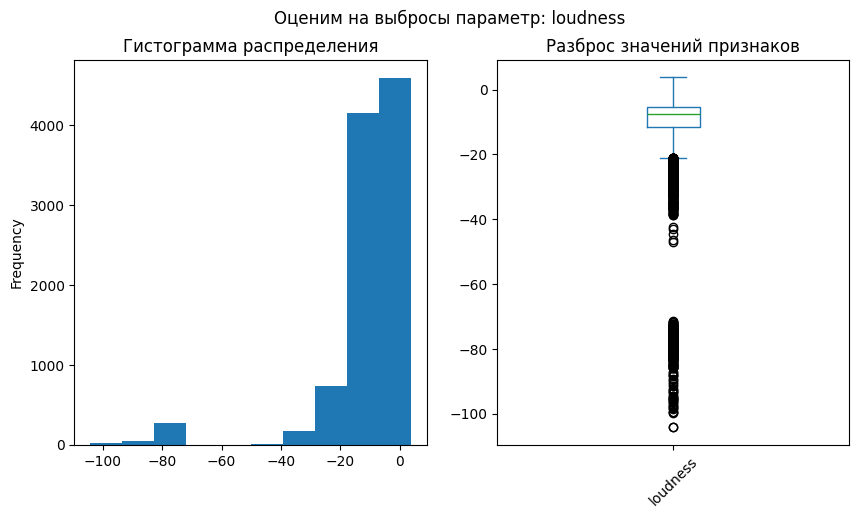

Оценим количественные данные в параметре speechiness
Тренировочные данные:
Описание данных в колонке speechiness


count   40,000.00
mean         0.13
std          0.21
min          0.02
25%          0.04
50%          0.05
75%          0.11
max          1.89
Name: speechiness, dtype: float64

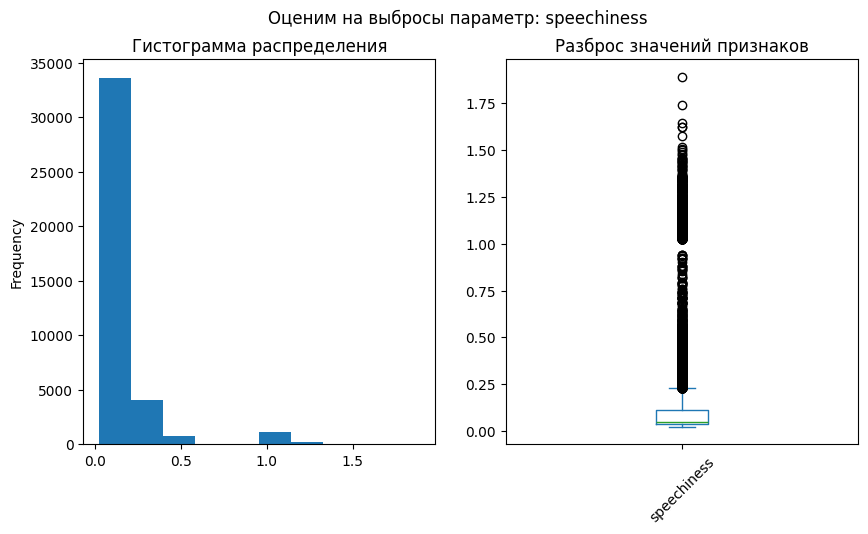

Тестовые данные:
Описание данных в колонке speechiness


count   10,000.00
mean         0.13
std          0.22
min          0.02
25%          0.04
50%          0.05
75%          0.12
max          1.79
Name: speechiness, dtype: float64

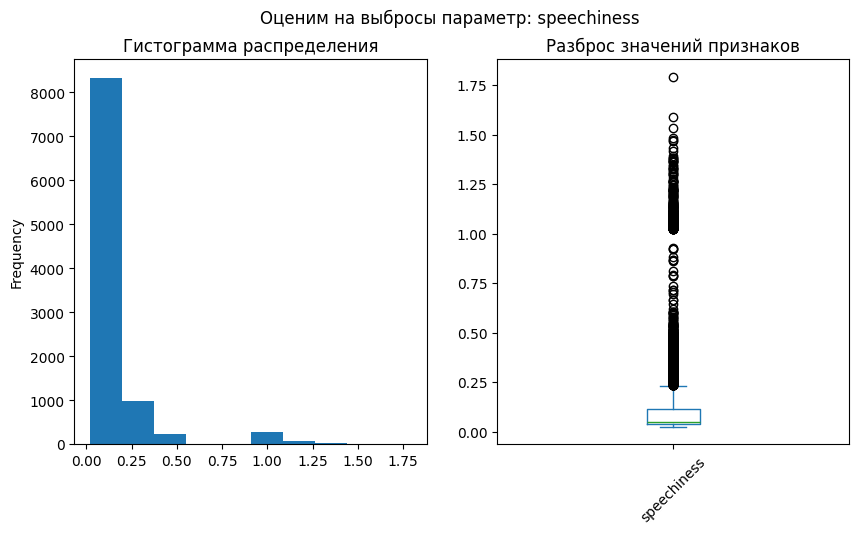

Оценим количественные данные в параметре tempo
Тренировочные данные:
Описание данных в колонке tempo


count   36,004.00
mean       119.93
std         30.64
min         34.47
25%         94.88
50%        119.86
75%        140.41
max        220.28
Name: tempo, dtype: float64

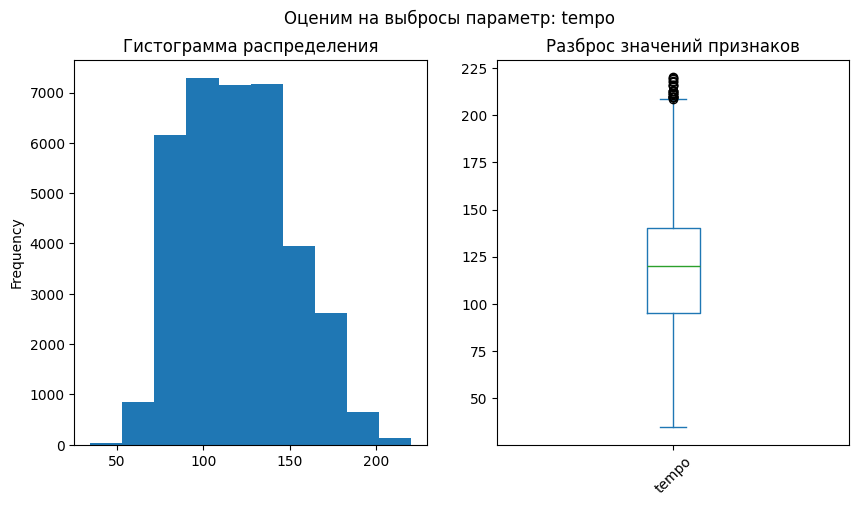

Тестовые данные:
Описание данных в колонке tempo


count   9,016.00
mean      120.03
std        30.65
min        34.35
25%        95.00
50%       119.92
75%       140.62
max       217.93
Name: tempo, dtype: float64

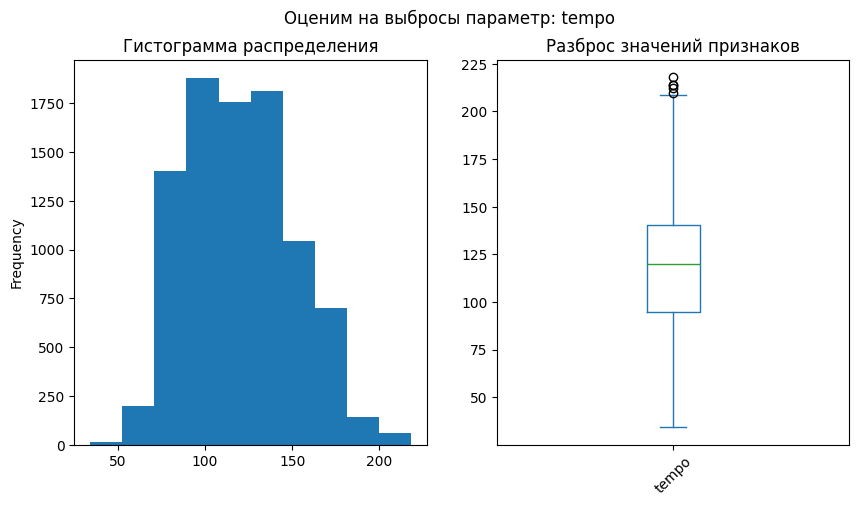

Оценим количественные данные в параметре valence
Тренировочные данные:
Описание данных в колонке valence


count   40,000.00
mean         0.46
std          0.25
min          0.00
25%          0.26
50%          0.45
75%          0.65
max          0.99
Name: valence, dtype: float64

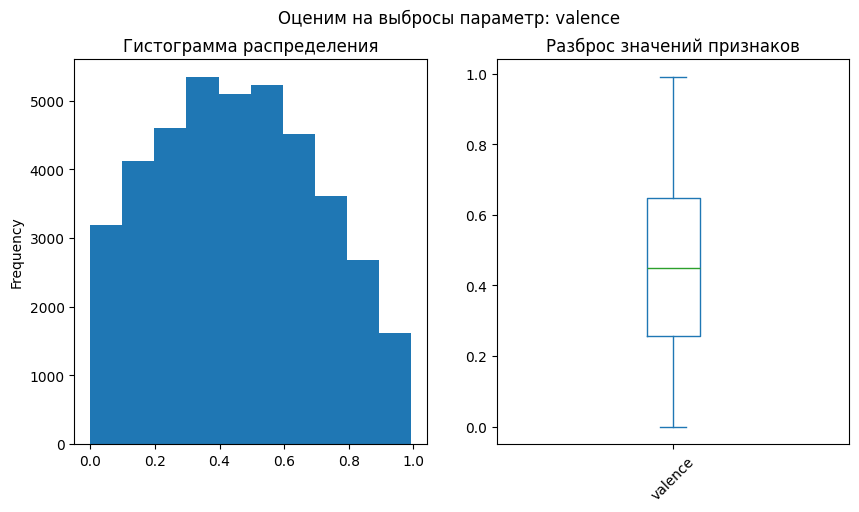

Тестовые данные:
Описание данных в колонке valence


count   10,000.00
mean         0.45
std          0.25
min          0.02
25%          0.26
50%          0.44
75%          0.65
max          0.99
Name: valence, dtype: float64

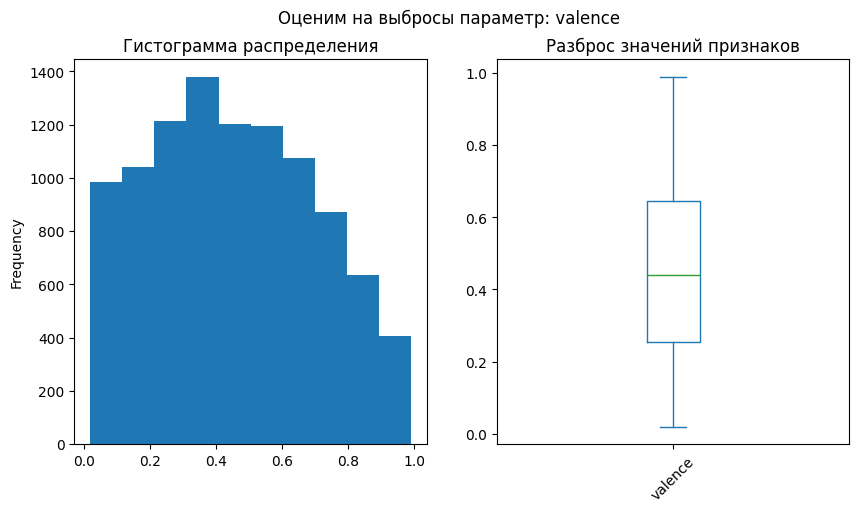

In [30]:
num_col = df.select_dtypes(include=['float', 'int']).columns

for col in num_col[1:]:
    print('Оценим количественные данные в параметре', col)
    print('Тренировочные данные:')
    show_box_hist(df[col])
    print('Тестовые данные:')
    show_box_hist(df_test[col])

#### Выводы по количественным колонкам:

- Распределенны "нормально":
    - valence
    - tempo
    - danceability
    - popularity
- Возможно имеет смысл преобразовать в ранговые значения:
    - speechiness/instrumentalness/acousticness/liveness
- loudness - распрделен ненормлаьным способом с множеством выбросов
- duration_ms - есть треки длинной в 38 минут. Надо проверить на сколько их.


In [33]:
df.sort_values(by='duration_ms', ascending=False).head(15)

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
31627,40131,Lost Lands 2017 Mix,41.00,0.00,0.47,"4,830,606.00",0.95,0.01,C#,0.41,-1.93,Major,0.30,NaN,4-Apr,0.32,Electronic
14552,3786,Late Night Tales: Bonobo,NaN,0.53,NaN,"4,497,994.00",0.44,0.10,E,0.20,-11.50,Minor,0.16,76.87,4-Apr,0.08,Electronic
38743,14823,Mixtape 13,34.00,0.00,0.37,"4,276,000.00",0.78,0.07,D,0.10,-4.13,Major,0.06,138.29,4-Apr,0.15,Electronic
13287,49472,Rag Bhupali,26.00,0.82,0.27,"3,195,440.00",0.15,0.12,B,0.62,-95.29,Major,0.06,83.63,NaN,0.31,Classical
2557,26075,45:33:00,34.00,0.14,0.48,"2,764,934.00",0.90,0.66,G,0.10,-6.55,Major,0.05,113.02,4-Apr,0.19,Electronic
32396,2793,NaN,33.00,0.12,0.33,"2,019,293.00",0.74,0.70,F#,0.94,-10.47,Minor,0.05,153.04,4-Apr,0.26,Blues
4436,18705,NaN,12.00,0.93,0.26,"1,935,787.00",0.14,0.69,F,0.07,-17.35,Major,0.04,128.17,4-Apr,0.06,Classical
17465,1312,Das Lied von der Erde: 6. Der Abschied,4.00,0.98,0.14,"1,872,653.00",0.06,0.52,F,0.08,-22.03,Major,0.05,80.49,3-Apr,0.03,Classical
14530,45033,NaN,NaN,0.94,0.16,"1,778,440.00",0.35,0.90,A#,0.10,-80.53,Major,0.03,83.87,4-Apr,0.07,Classical
38165,11066,NaN,8.00,0.95,0.08,"1,617,333.00",0.12,0.74,D,0.71,-17.92,Major,0.04,56.85,4-Apr,0.04,Classical


Длинные мелодии это классические или электоронные композиции - важный показатель для их определения. 

### Categorical columns analysis

In [34]:
# Оценим категориальные данные
def cat_col_pie(col):
    """
    Функция которая строит круговую и столбиковую диаграммы для количественного параметра
    """
    print('Кол-во значение в колонке {}'.format(col.name))
    display(col.value_counts(normalize=True))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
    fig.suptitle('Оценим доли по значениям в категориальных параметрах: {}'.format(col.name))
    col.value_counts().plot(kind='pie', ax=axes[0], y=col.name, autopct="%.1f%%")
    axes[0].set_title('Доли по категориям')
    col.value_counts().sort_values(ascending=True).plot(kind='barh', ax=axes[1], rot=0)
    axes[1].set_title('Количество в группах')
    plt.tight_layout() #автоподбор отступов между графикамиа
    plt.show()

Кол-во значение в колонке key


key
G    0.12
C    0.11
C#   0.11
D    0.11
A    0.10
F    0.08
B    0.07
E    0.07
A#   0.07
G#   0.07
F#   0.06
D#   0.03
Name: proportion, dtype: float64

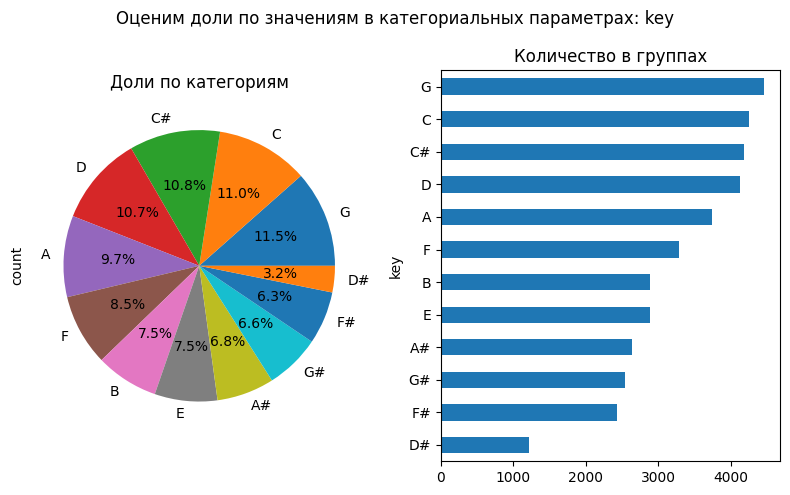

Кол-во значение в колонке mode


mode
Major   0.64
Minor   0.36
Name: proportion, dtype: float64

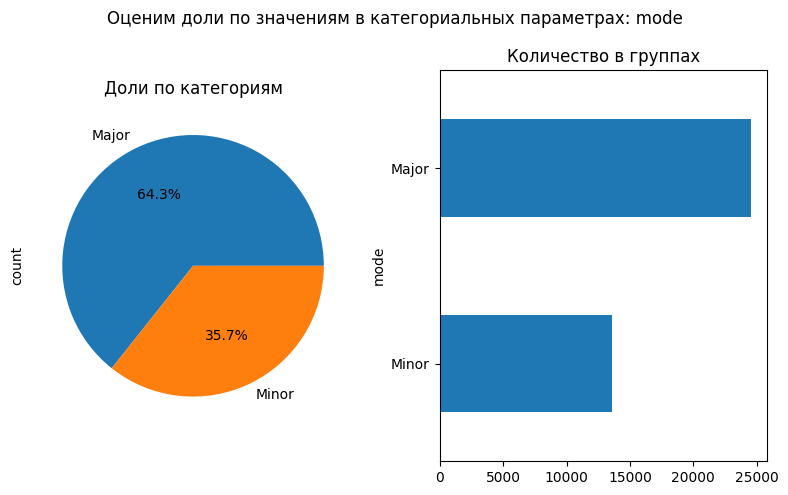

Кол-во значение в колонке music_genre


music_genre
Alternative   0.10
Jazz          0.10
Electronic    0.10
Anime         0.10
Blues         0.10
Country       0.10
Rap           0.10
Classical     0.10
Rock          0.10
Hip-Hop       0.10
Name: proportion, dtype: float64

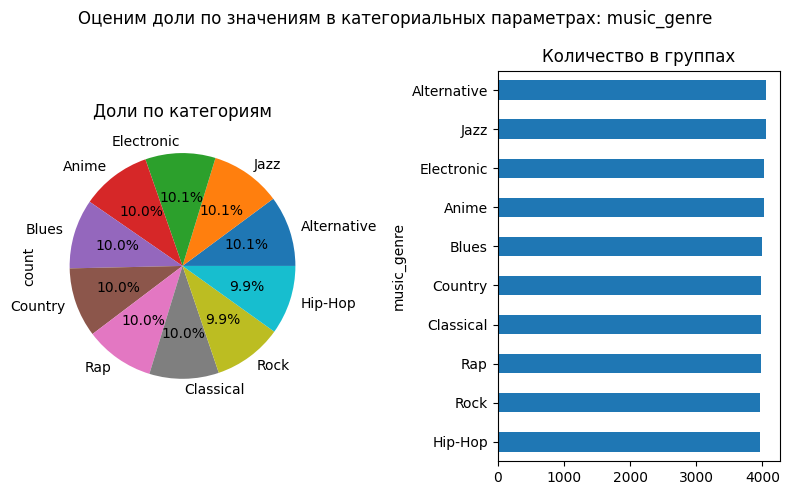

In [37]:
# оценим тренировочную выборку
cat_col = ['key', 'mode', 'music_genre']

for col in cat_col:
    cat_col_pie(df[col])

Кол-во значение в колонке key


key
C    0.11
G    0.11
C#   0.11
D    0.10
A    0.09
F    0.09
B    0.08
E    0.08
G#   0.07
A#   0.06
F#   0.06
D#   0.03
Name: proportion, dtype: float64

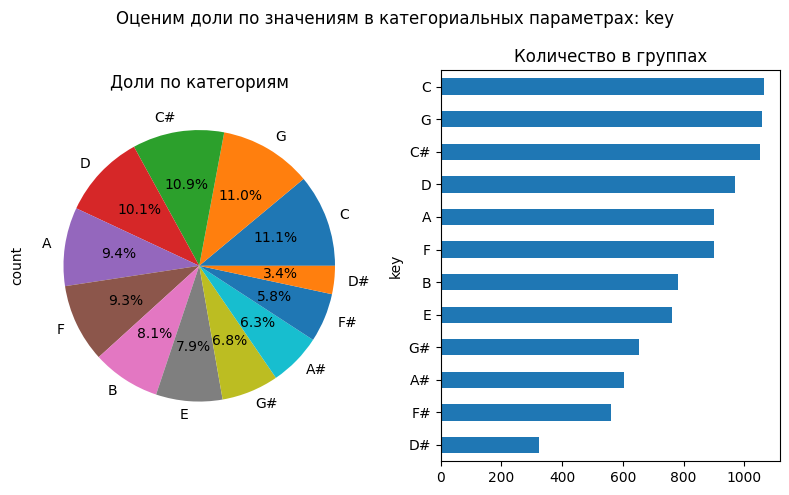

Кол-во значение в колонке mode


mode
Major   0.64
Minor   0.36
Name: proportion, dtype: float64

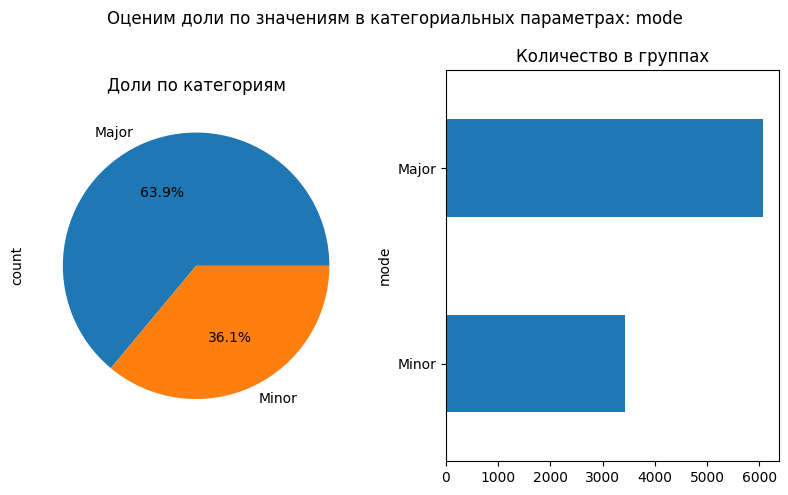

In [39]:
# оценим тестовую выборку

cat_col = ['key', 'mode']

for col in cat_col:
    cat_col_pie(df_test[col])

По категорильным колонкам близки тестовая и тренировочная выборки.